In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


You'll train a neural network to recognize items of clothing from a common dataset called Fashion MNIST.
It contains 70,000 items of clothing in 10 different categories.


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The print of the data for item 0 looks like this:

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

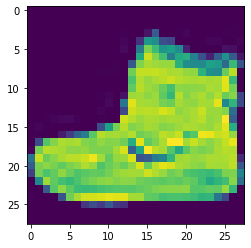

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

 Design the model:
 Sequential defines a sequence of layers in the neural network.
Flatten takes a square and turns it into a one-dimensional vector.
Dense adds a layer of neurons.
Activation functions tell each layer of neurons what to do. There are lots of options, but use these for now:
Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
Softmax takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4992 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3783 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3391 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3156 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2994 - accuracy: 0.8889


Test the model:

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3537 - accuracy: 0.8760


[0.35374176502227783, 0.8759999871253967]

In [9]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 0s 1ms/step
[9.85079623e-07 3.69659259e-09 3.75559694e-07 3.75227103e-07
 1.86930799e-06 1.15235485e-02 1.15407261e-06 4.33890224e-02
 7.39951975e-06 9.45075154e-01]


In [10]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.9.2
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 4.4786
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5406
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5040
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4949
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[2.8488066e-21 7.6563563e-21 2.7991652e-30 5.6524333e-18 5.1395283e-36
 9.9836860e-04 2.1492815e-24 3.7493028e-02 1.3841122e-16 9.6150863e-01]
9


In [11]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4740 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3575 - accuracy: 0.8695
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3238 - accuracy: 0.8802
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2966 - accuracy: 0.8902
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2801 - accuracy: 0.8969
